# Exploratory Data Analysis

## Load Required Libraries

In [1]:
# General packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import datetime as dt

In [2]:
## (Optional chunk)
# Current session information
import session_info
session_info.show(dependencies=False)

## Load data

Files of interest:
- `weir_calibration.csv` includes calibration points for the weir
- `bci_lutzweir_combined.csv` includes raw runoff measurement, corrected runoff measurement, data source (*Chart measurements can be removed)
- `bci_cl_ra_elect2.CSV` has corrected rainfall (`ra`) in mm with measurements of `0` as `NA`s (`bci_cl_ra_elect.csv` has `0`s)
- `bci_lutz_deep_gsm_man.csv`, `bci_lutz_shallow_gsm_man.csv` have soil moisture measurements (water by wet weight and water by dry weight; one can be chosen for analysis as they are linearly related)
<!-- `bci_cl_ra_elect.csv` has corrected rainfall (`ra`) in mm, contains `0`s (large file) -->

All values level values are in mm, and datetime is in UTC-5 (Panama time zone).


### Import

In [3]:
## Calibrations dataset
data_calibrations = pd.read_csv(
    "data/weir_calibration.csv",
    usecols = ['datetime', 'weir_level'], # weir_hour is a repeat of the time in datetime and can be skipped
    parse_dates=['datetime'],
    date_format='%d/%m/%Y %H:%M:%S',
    index_col='datetime'
)

data_calibrations.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6465 entries, 1994-01-03 08:46:00 to 2025-09-02 08:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   weir_level  6465 non-null   int64
dtypes: int64(1)
memory usage: 101.0 KB


In [4]:
# Combined data

data_all_combined = pd.read_csv(
    "data/bci_lutzweir_combined.csv",
    usecols = ['datetime', 'level', 'raw', 'chk_note', 'chk_fail', 'comment', 'source'],
    parse_dates=['datetime'],
    dtype = {'source':'category', 'chk_note':'category', 'chk_fail':'str', 'comment':'str'},
    date_format='%d/%m/%Y %H:%M:%S',
    index_col='datetime'
)

# # This variation checks first if the dataset is already loaded into the workspace
# try:
#     if data_combined.empty == False:
#         print("Data loaded, random sample shown below")
#         print(data_combined.sample(n=5))
# except NameError:
#     print("Data has not yet been read in, loading now...")
#     data_combined = pd.read_csv(
#         "data/bci_lutzweir_combined.csv",
#         usecols = ['datetime', 'level', 'raw', 'chk_note', 'chk_fail', 'comment', 'source'],
#         parse_dates=['datetime'],
#         dtype = {'source':'category', 'chk_note':'category', 'chk_fail':'str', 'comment':'str'},
#         date_format='%d/%m/%Y %H:%M:%S'
#     )

data_all_combined.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3951119 entries, 1972-01-01 01:00:00 to 1977-03-06 23:45:00
Data columns (total 6 columns):
 #   Column    Dtype   
---  ------    -----   
 0   level     float64 
 1   raw       float64 
 2   chk_note  category
 3   chk_fail  object  
 4   comment   object  
 5   source    category
dtypes: category(2), float64(2), object(2)
memory usage: 158.3+ MB


In [5]:
# Rainfall dataset

# This data set skips the 0 readings (therefore much smaller):
data_all_rainfall = pd.read_csv(
    "data/bci_elect_cl_ra/bci_cl_ra_elect2.CSV",
    parse_dates=['datetime'],
    dtype = {'chk_note':'category', 'chk_fail':'str'},
    date_format='%d/%m/%Y %H:%M:%S',
    index_col='datetime'
)

# This data set includes the 0 readings:
# data_rainfall_zeroes = pd.read_csv(
#         "data/bci_elect_cl_ra/bci_cl_ra_elect.csv",
#         usecols = ['datetime', 'ra', 'raw', 'chk_note', 'chk_fail'],
#         # "data/bci_elect_cl_ra/bci_cl_ra_elect2.CSV",
#         # usecols = ['datetime', 'level', 'raw', 'chk_note', 'chk_fail', 'comment', 'source'],
#         parse_dates=['datetime'],
#         dtype = {'chk_note':'category', 'chk_fail':'str'},
#         # dtype = {'source':'category', 'chk_note':'category', 'chk_fail':'str', 'comment':'str'},
#         date_format='%d/%m/%Y %H:%M:%S'
#     )

data_all_rainfall.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 179640 entries, 1929-01-02 08:00:00 to 2025-08-04 11:55:00
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   ra        179640 non-null  float64 
 1   raw       179640 non-null  float64 
 2   chk_note  179640 non-null  category
 3   chk_fail  29 non-null      object  
dtypes: category(1), float64(2), object(1)
memory usage: 5.7+ MB


In [6]:
# Soil datasets

# Shallow
data_all_soil_shallow = pd.read_csv(
    "data/bci_manual_soilh/bci_lutz_shallow_gsm_man.csv",
    parse_dates=['date'],
    usecols = ['date', 'depth', 'sample', 'h2o_by_wet', 'chk_note', 'chk_fail'],
    dtype = {'depth':'category', 'sample':'category', 'chk_note':'category', 'chk_fail':'str'},
    date_format='%d/%m/%Y',
    index_col='date'
)

# Deep
data_all_soil_deep = pd.read_csv(
    "data/bci_manual_soilh/bci_lutz_deep_gsm_man.csv",
    parse_dates=['date'],
    usecols = ['date', 'depth', 'sample', 'h2o_by_wet', 'chk_note', 'chk_fail'],
    dtype = {'depth':'category', 'sample':'category', 'chk_note':'category', 'chk_fail':'str'},
    date_format='%d/%m/%Y',
    index_col='date'
)

data_all_soil_shallow.info()
data_all_soil_deep.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18556 entries, 1972-03-03 to 2025-06-26
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   depth       18556 non-null  category
 1   sample      18556 non-null  category
 2   h2o_by_wet  18556 non-null  float64 
 3   chk_note    18556 non-null  category
 4   chk_fail    178 non-null    object  
dtypes: category(3), float64(1), object(1)
memory usage: 490.8+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15637 entries, 1972-03-03 to 2025-06-26
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   depth       15637 non-null  category
 1   sample      15637 non-null  category
 2   h2o_by_wet  15637 non-null  float64 
 3   chk_note    15637 non-null  category
 4   chk_fail    20 non-null     object  
dtypes: category(3), float64(1), object(1)
memory usage: 413.4+ KB


*A note about the soil datasets:

Both `h2o_by_wet` and `h2o_by_dry` are available in the datasets.
Because they are linearly related to each other, only one of them is necessary for modelling.
Arbitrarily, `h2o_by_wet` has been chosen for this analysis.

### Cleanup

In [7]:
# Get earliest and latest dates of sources

cat_source = data_all_combined.sort_index()['source'].unique().tolist()
# Header for printed table
print("Earliest", "\t    ", "Latest", "\t\t", "Source")
# Iterate across each source type
for cat in cat_source:
    # If the source is NaN
    if pd.isna(cat) == True:
        temp_subset = data_all_combined[data_all_combined['source'].isnull()]
    else:
        temp_subset = data_all_combined[data_all_combined['source'] == cat]
    # Sort index
    temp_subset = temp_subset.sort_index()
    # Print
    print(temp_subset.index[0], "", temp_subset.index[-1], cat)

# Save space, remove no longer needed items
del cat_source, cat, temp_subset

Earliest 	     Latest 		 Source
1972-01-01 01:00:00  2015-03-18 14:15:00 CHART
1972-09-16 00:15:00  2025-08-01 13:00:00 nan
1989-07-19 11:55:00  1996-10-01 23:55:00 CHART+AF
1996-10-02 00:00:00  2013-01-13 05:50:00 ISCO
2012-04-23 08:30:00  2012-04-24 08:35:00 ESTIMATED
2014-08-22 10:30:00  2021-05-19 09:40:00 RADAR
2018-08-31 10:05:00  2018-09-05 12:55:00 TROLL


In [8]:
# Filtering data sets for relevant dates

# Exclude old chart data
# data_combined = data_all_combined[~data_all_combined['source'].str.contains("CHART", na=False)]
# data_combined = data_all_combined[~data_all_combined['source']=="CHART"]

# Filter the dataset to only be non-CHART values
data_combined = data_all_combined[data_all_combined['source'] != 'CHART']

# Remove missing values
# data_combined = data_combined[data_combined['chk_note'] != 'missing']
## Note- not all -999 values are tagged as missing...

# Arrange
data_combined = data_combined.sort_index()
# Remove a few extra points
data_combined = data_combined['1978-01-01 00:00:01':]

# Get earliest and latest dates
date_weir_start = data_combined.index[0]
date_weir_end = data_combined.index[-1]

# Create function to filter dates
def filter_dates(input_dataset, input_date_start = date_weir_start, input_date_end = date_weir_end):
    # Sort the dataframe
    data_subset = input_dataset.sort_index()
    # Filter between dates
    data_subset = data_subset.loc[input_date_start:input_date_end]
    return data_subset

# Apply filter
data_rainfall = filter_dates(data_all_rainfall)
data_soil_deep = filter_dates(data_all_soil_deep)
data_soil_shallow = filter_dates(data_all_soil_shallow)

In [9]:
# Remove old stuff
del data_all_combined, data_all_rainfall, data_all_soil_shallow, data_all_soil_deep

## General Variable Exploration

In [10]:
# Exploring strange soil data points
shallow_all = pd.read_csv(
    "data/bci_manual_soilh/bci_lutz_shallow_gsm_man.csv",
    parse_dates=['date'],
    usecols = ['date', 'depth', 'sample', 'h2o_by_wet', 'h2o_by_dry', 'chk_note', 'chk_fail'],
    dtype = {'depth':'category', 'sample':'category', 'chk_note':'category', 'chk_fail':'str'},
    date_format='%d/%m/%Y',
    index_col='date'
)

# shallow_all = shallow_all.sort_index().loc[date_weir_start:date_weir_end]
shallow_all = filter_dates(shallow_all)
# shallow_all = shallow_all.reset_index()

# # Deep
deep_all = pd.read_csv(
    "data/bci_manual_soilh/bci_lutz_deep_gsm_man.csv",
    parse_dates=['date'],
    usecols = ['date', 'depth', 'sample', 'h2o_by_wet', 'h2o_by_dry', 'chk_note', 'chk_fail'],
    dtype = {'depth':'category', 'sample':'category', 'chk_note':'category', 'chk_fail':'str'},
    date_format='%d/%m/%Y',
    index_col='date'
)

deep_all = filter_dates(deep_all)
deep_all = deep_all[deep_all["depth"] != "30-40"]#.reset_index()

# Filter set to only be of dates where deep set has shallow values
shallow_all = shallow_all[shallow_all.index.isin(deep_all.index)]
shallow_all.reset_index()

match_all = pd.merge(deep_all.reset_index(), shallow_all.reset_index(), on=["date", "sample"], suffixes=("_deep", "_shallow"), how="inner")
match_all["match_wet"] = (match_all["h2o_by_wet_deep"] == match_all["h2o_by_wet_shallow"])
match_all["match_dry"] = (match_all["h2o_by_dry_deep"] == match_all["h2o_by_dry_shallow"])
match_all["sample"] = match_all["sample"].astype('int')
match_all = match_all.sort_values(by=['date', 'sample'])
match_all = match_all.drop(['chk_fail_shallow', 'chk_fail_deep'], axis=1)
match_all = match_all[((match_all["match_wet"]==False) | (match_all["match_wet"]==False))]
match_all = match_all[['date', 'depth_shallow', 'depth_deep', 'sample', 'h2o_by_wet_shallow', 'h2o_by_wet_deep', 'h2o_by_dry_shallow', 'h2o_by_dry_deep', 'chk_note_shallow', 'chk_note_deep']]

match_all

del deep_all, shallow_all, match_all

In [11]:
# Source insights
print(data_combined['1978-01-01 00:00:01':].groupby('source', dropna=False, observed=True)['raw'].agg(['count','mean', 'min', 'max']))

             count        mean    min     max
source                                       
CHART+AF    752435   52.028467    0.0   914.6
ISCO       1656120   46.713607 -999.0   956.6
ESTIMATED      290   14.797241   11.2    34.9
RADAR       702704   49.148286 -999.0  2904.5
TROLL         1428    0.000000    0.0     0.0
NaN         523281 -118.049469 -999.0  2876.0


In [12]:
# Explore weir combined data, comments, etc.
print(
    "-----Data types-----", data_combined.dtypes,
    "\n-----Source-----", data_combined['source'].value_counts(dropna = False),
    "\n-----Notes-----", data_combined['chk_note'].value_counts(dropna = False),
    "\n-----Comments-----", data_combined['comment'].value_counts(dropna = False),
    "\n-----Fail mode-----", data_combined['chk_fail'].value_counts(dropna = False),
    sep="\n"
)

-----Data types-----
level        float64
raw          float64
chk_note    category
chk_fail      object
comment       object
source      category
dtype: object

-----Source-----
source
ISCO         1656120
CHART+AF      752435
RADAR         702704
NaN           523281
TROLL           1428
ESTIMATED        290
CHART              0
Name: count, dtype: int64

-----Notes-----
chk_note
good        2455818
adjusted     832182
nc           333964
missing       14293
bad               1
Name: count, dtype: int64

-----Comments-----
comment
NaN             3636242
Data missing         16
Name: count, dtype: int64

-----Fail mode-----
chk_fail
NaN                                                   2810553
Calibration                                            399338
Obstruction                                            302756
Gap Fill                                                73670
Obstruction, Calibration                                20644
Calibration, Obstruction                       

## Visualization

In [13]:
def plot_between(input_date_start, input_date_end):
    data_subset = data_combined.loc[input_date_start:input_date_end]

    data_subset_rain = data_rainfall.sort_index()
    data_subset_rain = data_subset_rain.loc[input_date_start:input_date_end]

    data_subset_cal = data_calibrations.sort_index()
    data_subset_cal = data_subset_cal.loc[input_date_start:input_date_end]
    # plt.figure(figsize = (10,6))
    # plt.plot(data_subset.index, data_subset['raw'])

    fig, ax = plt.subplots(figsize=(10, 6))
    # ax.figure(figsize=(10, 6))
    plt.axhline(y=0, color = "grey", linestyle = ":")
    ax.vlines(data_subset_rain.index, ymin=0, ymax=data_subset_rain['ra']*3, color = "blue", label = "Rain (x3)")
    ax.plot(data_subset.index, data_subset['level'], color = "red", label = "Adjusted")
    ax.plot(data_subset.index, data_subset['raw'], color = "green", label = "Raw")
    ax.plot(data_subset_cal.index, data_subset_cal['weir_level'], linestyle='none', marker='x', color="red", label = "Calibration")
    # plt.plot(data_subset_rain.index, data_subset_rain['ra']*3, color = "blue", linestyle='none', marker='o')
    # plt.plot(data_calibrations.index, data_calibrations['level'], color = "red")
    ax.set_xlabel('Date (YYYY-MM-DD)')
    ax.set_ylabel('Level (mm)')
    # ax.set_title('Simple Time Series Plot')
    # ax.set_ylim(bottom=0) 
    # ax.grid(True)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.legend(loc = 'upper right')
    return plt.show()

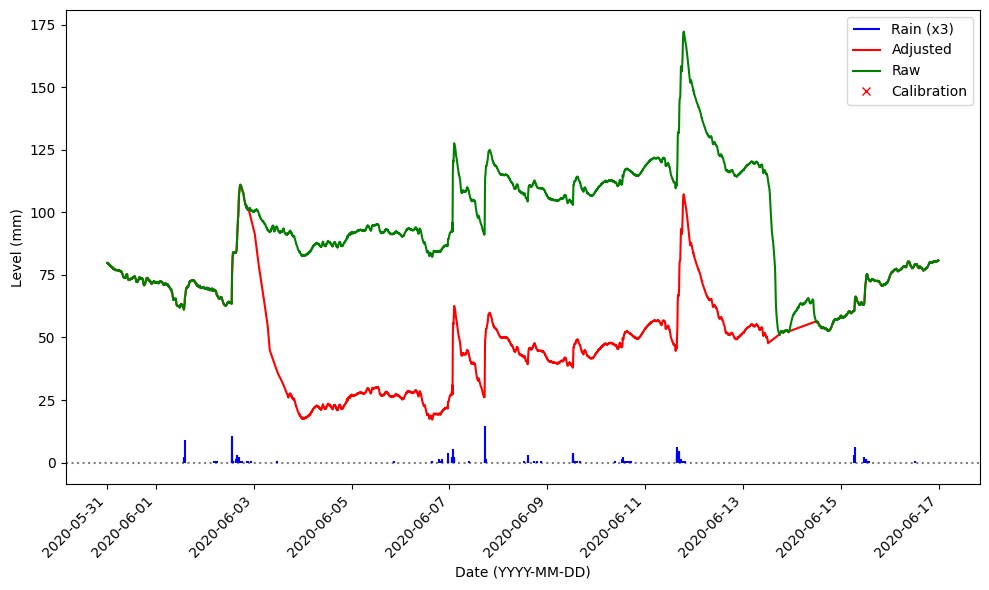

In [14]:
# plot_between('2010-05-20 00:00:01','2010-05-25 23:59:59')
plot_between('2020-05-31 00:00:01','2020-06-16 23:59:59')
# plot_between('2023-05-14 00:00:01','2023-06-15 23:59:59')
# plot_between('2002-07-30 00:00:01','2002-08-02 23:59:59')

## Statistics

In [15]:
# data_dec_explore = data_all_combined.sort_index()['1989-01-01 00:00:01':'1989-12-12 23:59:59']
# data_dec_explore = data_dec_explore[data_dec_explore['source']!='CHART']
# data_dec_explore

In [18]:
# time_series = pd.Series(data_combined, index='datetime')
# time_series
# pd.DatetimeIndex.to_series(data_combined)
# time_series = pd.to_datetime(data_combined.index())

# data_combined.index.year
# data_mini = data_combined['2010-05-20 00:00:01':'2010-05-25 23:59:59']
# data_mini = data_combined['2010-05-01 00:00:01':'2010-10-31 23:59:59']
# data_mini['raw'].resample('1ME').agg(['mean','std'])

# data_mini.rolling(2, on='raw').sum()
# data_mini.rolling('1D', on='raw').sum()
# data_mini['raw'].rolling('1D').mean()
# data_mini['raw'].rolling('1D', closed='left').mean()
# data_mini['raw'].resample('1D').mean()

# data_mini['raw'].resample('1ME').mean()
# data_combined['raw'].dropna()
# data_combined['raw'].resample('YE').agg(['mean','std'])
# data_mini = data_combined['raw'].dropna()
# data_combined['1972-01-01 00:00:01':'1973-12-31 23:59:59']

# # Remove missing values
# data_mini = data_combined[data_combined['chk_note']!='missing']
# # Remove a few extra points
# data_mini = data_mini['1978-01-01 00:00:01':]
# data_mini.resample('YE').agg(['mean','std'])

# data_sumstats = data_mini['1989-01-01 00:00:01':'1989-12-31 23:59:59']
# data_sumstats = data_combined['raw'].dropna().resample('6ME').agg(['mean','std']).dropna()
data_sumstats = data_combined['raw'].dropna().resample('1ME').agg(['mean','std']).dropna()
data_sumstats
# plt.figure(figsize=(12,6))
# plt.plot(data_sumstats.index, data_sumstats['mean'])
# plt.plot(data_sumstats.index, data_sumstats['std'])
# plt.show()

# print(data_mini['source'].value_counts(dropna = False))
# data_mini.rolling('1D').sum()
# data_mini.rolling(5).sum()

,mean,std
datetime,,
1989-07-31,26.962066,28.596596
1989-08-31,41.532953,19.832557
1989-09-30,37.446667,14.939121
1989-10-31,66.417876,44.119459
1989-11-30,84.477141,36.509967
...,...,...
2025-04-30,7.676016,7.358937
2025-05-31,54.021459,38.264260
2025-06-30,68.433450,36.689618


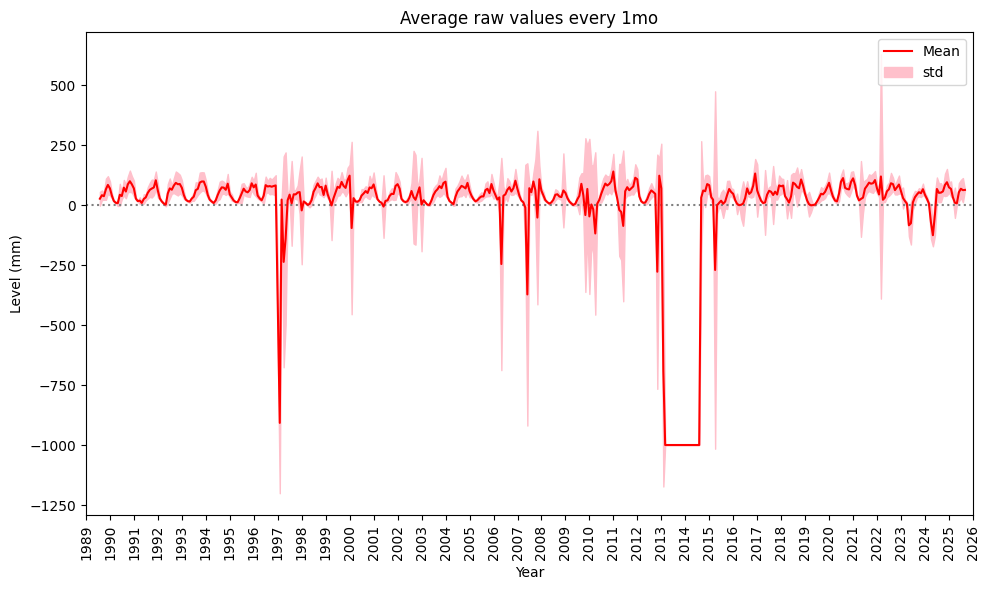

In [23]:
#Plot

fig, ax = plt.subplots(figsize=(10, 6))
    # ax.figure(figsize=(10, 6))
plt.axhline(y=0, color = "grey", linestyle = ":")
# ax.vlines(data_subset_rain.index, ymin=0, ymax=data_subset_rain['ra']*3, color = "blue", label = "Rain (x3)")
# ax.plot(data_sumstats.index, data_sumstats['mean'], color = "red", label = "Mean", marker = 'x')
ax.plot(data_sumstats.index, data_sumstats['mean'], color = "red", label = "Mean")
# ax.plot(data_sumstats.index, data_sumstats['std'], color = "green", label = "std")
ax.fill_between(data_sumstats.index, data_sumstats['mean']-data_sumstats['std'], data_sumstats['mean']+data_sumstats['std'], color = "pink", label = "std")
# ax.plot(data_subset_cal.index, data_subset_cal['weir_level'], linestyle='none', marker='x', color="red", label = "Calibration")
# plt.plot(data_subset_rain.index, data_subset_rain['ra']*3, color = "blue", linestyle='none', marker='o')
# plt.plot(data_calibrations.index, data_calibrations['level'], color = "red")
ax.set_xlabel('Year')
ax.set_ylabel('Level (mm)')
ax.set_title('Average raw values every 1mo')
# ax.set_title('Simple Time Series Plot')
# ax.set_ylim(bottom=0) 
ax.set_xlim(left = dt.date(1989, 1, 1), right=dt.date(2026, 1, 1))
# ax.grid(True)
# ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6)) # Show ticks every month
ax.xaxis.set_major_locator(mdates.YearLocator(month=1)) # Show ticks every month
# ax.xaxis.set_minor_locator(mdates.YearLocator(month=7)) # Show ticks every month
# plt.xticks(np.arange(min(data_sumstats.index), max(data_sumstats.index)+1, 1.0),rotation=45, ha='right')
plt.xticks(rotation=90)
# ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.tight_layout()
plt.legend(loc = 'upper right')

plt.show()

del fig, ax

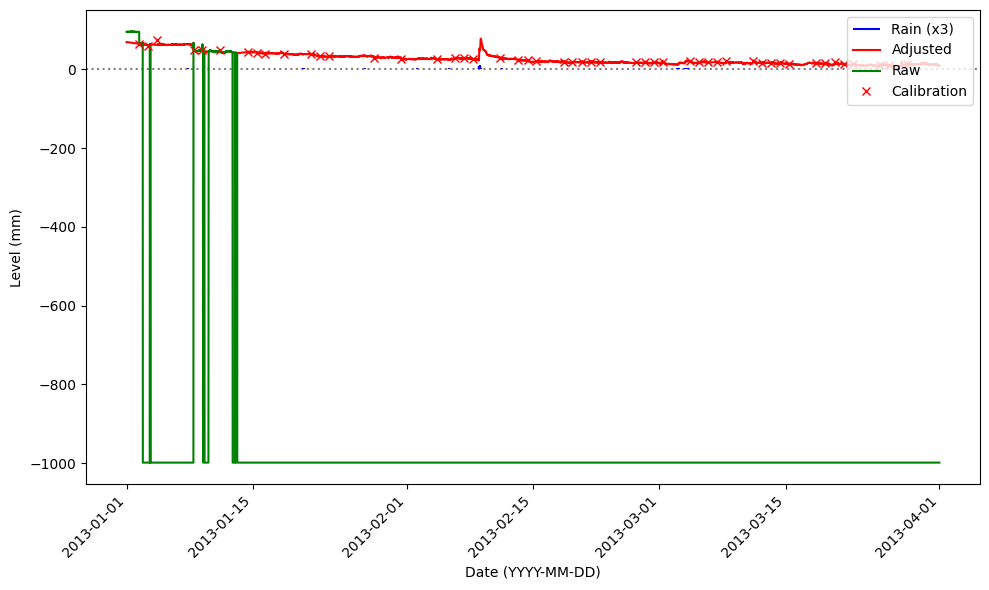

,level,raw,chk_note,chk_fail,comment,source
datetime,,,,,,
2013-01-01 00:05:00,69.32,95.0,adjusted,Obstruction,NaN,ISCO
2013-01-01 00:10:00,69.31,94.9,adjusted,Obstruction,NaN,ISCO
2013-01-01 00:15:00,69.30,95.3,adjusted,Obstruction,NaN,ISCO
2013-01-01 00:20:00,69.29,95.4,adjusted,Obstruction,NaN,ISCO
2013-01-01 00:25:00,69.28,95.5,adjusted,Obstruction,NaN,ISCO
...,...,...,...,...,...,...
2013-03-31 23:31:17,8.64,-999.0,adjusted,Gap Fill,NaN,NaN
2013-03-31 23:44:40,8.42,-999.0,adjusted,Gap Fill,NaN,NaN
2013-03-31 23:49:40,8.57,-999.0,adjusted,Gap Fill,NaN,NaN


In [25]:
plot_between('2013-01-01 00:00:01','2013-03-31 23:59:59')

data_combined['2013-01-01 00:00:01':'2013-03-31 23:59:59']